<a href="https://colab.research.google.com/github/yegor-vynokurov/secrets_of_pandas/blob/main/pandas_secrets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Secrets

At work, I ask Google a lot of questions. Some of the answers, so as not to search again, I collect here.



1.   How to read .arff file
2.   How to quickly change to number-categorical values from b'asdf'
3.   How to transform log-normal distribution to normal with np.log
4.   Groupby and cut, qcut for analysis
5.   Give quickly the categorical columns from names
6.   To see the NaNs visually

# How to read .arff file

In [ ]:
from scipy.io import arff
import numpy as np
import pandas as pd
#Load the data using "arff.loadarff" then convert it to dataframe
data = arff.loadarff('/content/drive/MyDrive/Colab Notebooks/cancer/hepatitis.arff')
df = pd.DataFrame(data[0])

# How to change to number-categorical values from b'asdf'

In [ ]:
df.columns # to see all columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [ ]:
# choose columns when we want to change
cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology', 'class']

In [ ]:
def changer(cols, df)
  for col in cols:
    print(col) # to see in which columns we work
    for idx, value in enumerate(df[col].unique()):
      print(idx, value) # to see how index corresponds to value
      for i in range(len(df[col].to_numpy())):
        if df.loc[i, col] == value:
          df.loc[i, col] = idx
  return df

# How to transform log-normal distribution to normal with np.log

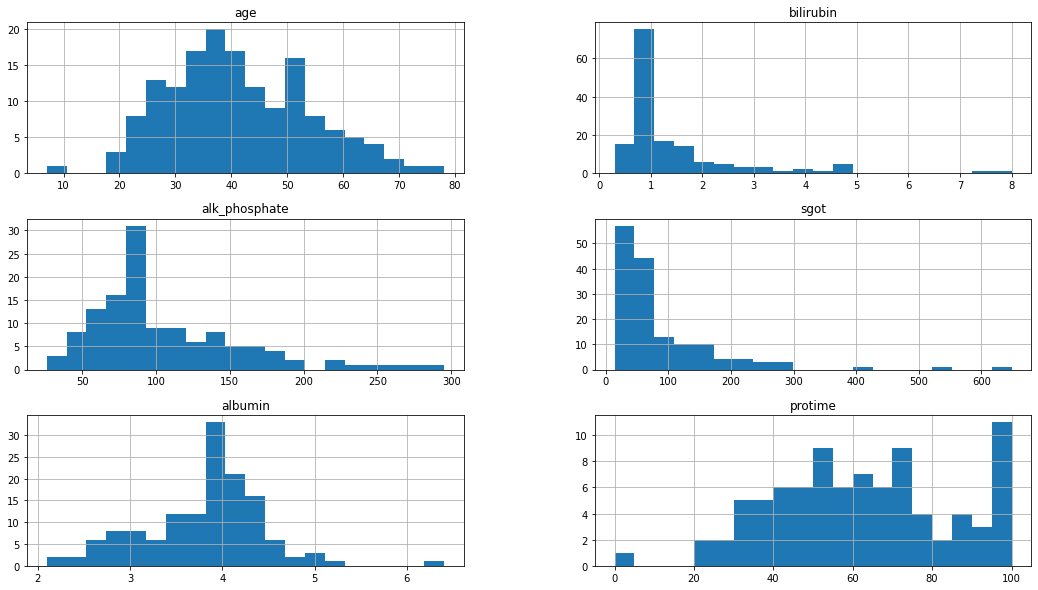

In [ ]:
df.hist(figsize = (18, 10), bins = 20) # see the hists and choose lognormal distribution:
plt.show()

In [ ]:
df.columns # from all columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [ ]:
for c in ['bilirubin', 'alk_phosphate', 'sgot', 'albumin']: # we take lognormals distribution
  df[c] = np.log(df[c]) # apply np.log to all values
  df[c][np.isinf(df[c])] = 0 # if we applied np.log to 0, we have np.inf and change it to 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


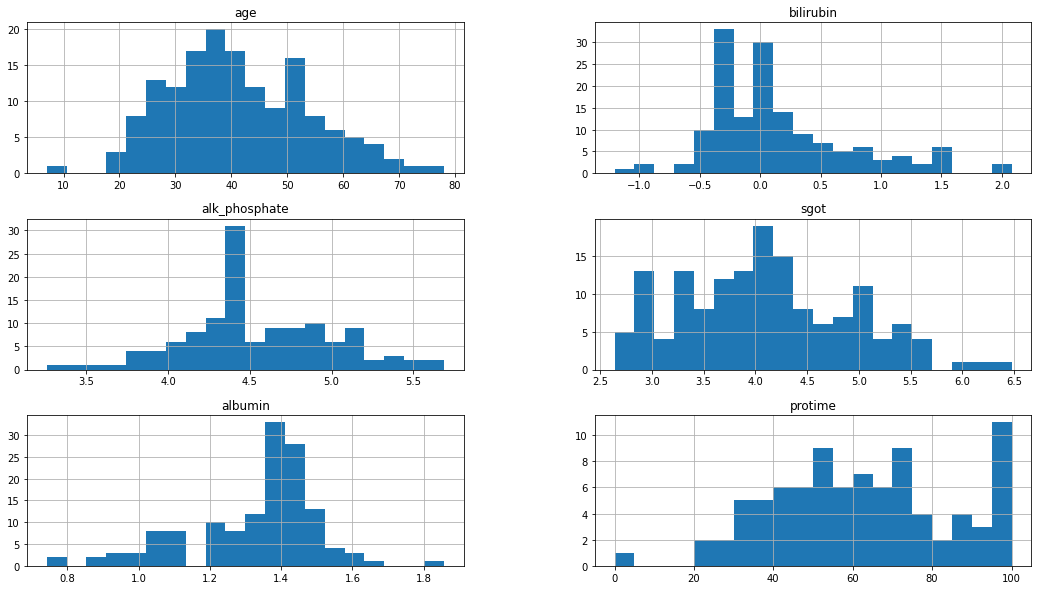

In [ ]:
df.hist(figsize = (18, 10), bins = 20) # see the beautifull normal distributions
plt.show()

# groupby and cut, qcut for analysis

In [ ]:
df.groupby(['class', 'sex'])['sex'].agg(['count', 'mean', 'median'])

count  mean  median
class sex                     
0     0       16   0.0     0.0
      1      107   1.0     1.0
1     1       32   1.0     1.0

в классе "умерли" представлены только мужчины

In [ ]:
df.groupby(['class', 'steroid'])['steroid'].agg(['count', 'mean', 'median'])


count  mean  median
class steroid                     
0     0           56   0.0     0.0
      1           66   1.0     1.0
      2            1   2.0     2.0
1     0           20   0.0     0.0
      1           12   1.0     1.0

неизвестные данные по стероидам есть только для класса "выздоровели". 

In [ ]:
df.groupby(['class'])['steroid'].agg(['count', 'mean', 'median'])


,count,mean,median
class,,,
0,123,0.552846,1.0
1,32,0.375000,0.0


среднее значение стероидов у выздоровевших больше; медиана больше

In [ ]:
df['cut'] = pd.cut(df['age'], 5)

In [ ]:
df.groupby(['cut', 'class'])['class'].agg(['count', 'mean', 'median'])

count  mean  median
cut           class                     
(6.929, 21.2] 0          4   0.0     0.0
              1          0   NaN     NaN
(21.2, 35.4]  0         45   0.0     0.0
              1          5   1.0     1.0
(35.4, 49.6]  0         42   0.0     0.0
              1         16   1.0     1.0
(49.6, 63.8]  0         25   0.0     0.0
              1         10   1.0     1.0
(63.8, 78.0]  0          7   0.0     0.0
              1          1   1.0     1.0

до 21 года смертельных случаев нет

In [ ]:
df['cut2'] = pd.qcut(df['age'], 4)


In [ ]:
df.groupby(['cut2', 'class'])['class'].agg(['count', 'mean', 'median'])


count  mean  median
cut2          class                     
(6.999, 32.0] 0         39   0.0     0.0
              1          2   1.0     1.0
(32.0, 39.0]  0         32   0.0     0.0
              1          7   1.0     1.0
(39.0, 50.0]  0         25   0.0     0.0
              1         13   1.0     1.0
(50.0, 78.0]  0         27   0.0     0.0
              1         10   1.0     1.0

In [ ]:
df.groupby(['cut2'])['class'].agg(['count', 'mean', 'median'])


,count,mean,median
cut2,,,
"(6.999, 32.0]",41,0.048780,0.0
"(32.0, 39.0]",39,0.179487,0.0
"(39.0, 50.0]",38,0.342105,0.0
"(50.0, 78.0]",37,0.270270,0.0


процент умерших больше от 40 до 50

In [ ]:
df['bil2'] = pd.qcut(df['bilirubin'], 4)
df.groupby(['cut2'])['class'].agg(['count', 'mean', 'median'])

,count,mean,median
cut2,,,
"(6.999, 32.0]",41,0.048780,0.0
"(32.0, 39.0]",39,0.179487,0.0
"(39.0, 50.0]",38,0.342105,0.0
"(50.0, 78.0]",37,0.270270,0.0


от 40 до 50 максимальный билирубин

# give the categorical columns from names
alternate to one hot encoding. Use for machint learning if it is not deep learning

In [ ]:
df  = pd.get_dummies(df, drop_first=True)

# to see the NaNs visually

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))                                             
sns_heatmap = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='plasma') # visualize of nans
plt.show()